In [1]:
import pandas as pd
import bt
import matplotlib.pyplot as plt

df = pd.read_csv('training-set_USDT_BTC-3.csv')
df["date"] = pd.to_datetime(df["date"])
len(df["close"])

ModuleNotFoundError: No module named 'bt'

In [2]:
# plot closing price and EMA
ema = df["close"].ewm(span=200, adjust=False).mean()
ema1 = df["close"].ewm(span=10, adjust=False).mean()
sma = df["close"].rolling(window=5).mean()
plt.figure(figsize=(12,6))
plt.plot(df["close"], label='Close Price')
plt.plot(ema, label='EMA', color='red')
# plt.plot(ema1, label='EMA 1', color='green')
plt.title('Close Price and EMA')
plt.legend()
plt.show()

# plot candlestick chart OHLC with EMA


NameError: name 'df' is not defined

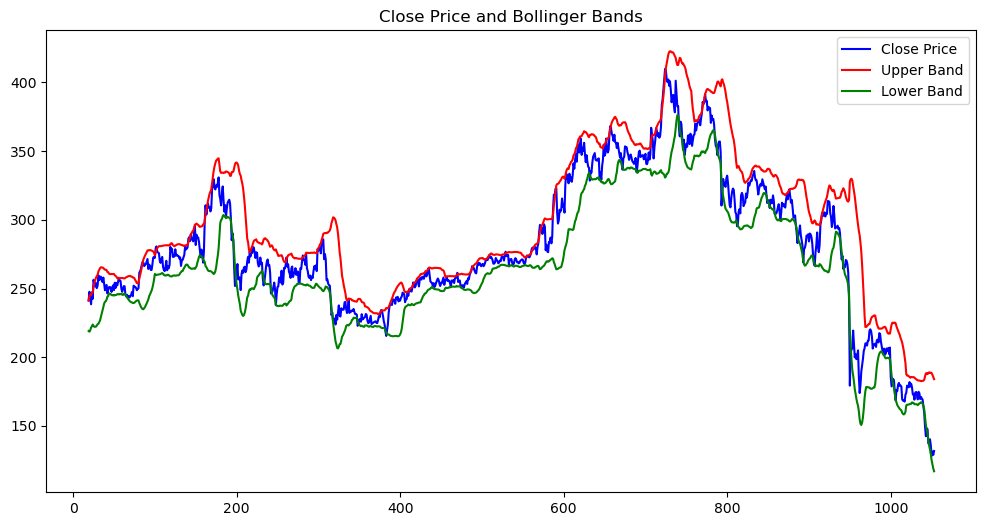

In [72]:
# add bolinger bands
df['20 Day MA'] = df['close'].rolling(window=20).mean()
df['20 Day STD'] = df['close'].rolling(window=20).std()
df['Upper Band'] = df['20 Day MA'] + (df['20 Day STD'] * 2)
df["Lower Band"] = df['20 Day MA'] - (df['20 Day STD'] * 2)
df = df.dropna()

# sells = [229.83, 279.04, 308.08, 367.0, 383.64, 313.66]
# df['sell'] = df['close'].where(df['close'].isin(sells))
buys = [241.88, 242.07, 241.21, 243.5, 242.62, 243.95, 240.65, 242.03, 241.22, 243.39, 244.2, 246.98, 246.48, 245.72, 242.06, 242.35, 247.42, 244.67, 249.45, 249.78, 248.02, 247.8, 250.58, 254.43, 252.1, 250.82, 251.96, 255.63, 257.02, 254.12, 251.54, 256.88, 257.57, 256.5, 258.53, 258.12, 257.07, 260.13, 261.84, 258.81, 259.77, 263.66, 265.07, 260.33, 255.2, 254.47, 253.97, 251.72, 253.9, 251.1, 252.13, 254.29, 255.78, 257.26, 256.3, 253.79, 251.83, 254.2, 253.83, 256.05, 258.03, 252.7, 255.88, 256.28, 258.51, 255.5, 255.97, 255.62, 253.95, 251.22, 255.86, 255.22, 256.0, 254.01, 257.37, 257.71, 258.19, 261.43, 254.74, 255.34, 255.86, 251.22, 250.7, 252.45, 252.14, 250.73, 253.22, 254.19, 255.31, 253.32, 257.45, 256.61, 259.87, 261.39, 262.87, 266.25, 264.73, 265.03, 263.06, 261.52, 261.0, 265.49, 268.69, 267.07, 268.59, 267.88, 266.24, 266.92, 267.94, 266.26, 267.19, 268.93, 271.13, 270.77, 270.72, 272.93, 274.16, 272.34, 273.16, 272.13, 270.7, 268.12, 268.09, 269.0, 272.2, 270.82, 270.06, 268.37, 268.91, 270.37, 269.92, 272.78, 273.45, 272.96, 270.33, 274.01, 276.78, 273.56, 273.95, 274.61, 267.57, 271.0, 271.24, 271.49, 268.74, 267.46, 268.01, 270.81, 272.1, 270.99, 269.14, 269.31, 268.3, 268.85, 270.26, 270.65, 271.21, 271.01, 268.7, 267.84, 268.88, 272.46, 274.0, 273.26, 273.16, 272.66, 273.82, 275.9, 279.04, 279.8, 278.31, 280.05, 280.21, 279.33, 274.85, 280.22, 282.84, 291.13, 296.34, 293.88, 294.08, 289.72, 293.41, 296.73, 294.87, 277.87, 281.87, 276.92, 276.46, 283.87, 283.69, 287.08, 282.87, 287.83, 308.08, 318.33, 317.54, 322.46, 322.89, 305.39, 297.31, 299.51, 307.4, 306.0, 307.25, 315.51, 309.43, 311.02, 305.23, 325.18, 333.91, 329.75, 332.32, 326.59, 333.55, 328.53, 330.87, 327.69, 332.35, 341.08, 337.19, 343.62, 347.83, 342.29, 352.09, 354.82, 348.99, 355.38, 359.0, 347.26, 352.41, 350.1, 356.04, 347.7, 341.98, 347.06, 342.11, 338.67, 337.91, 328.52, 335.41, 334.36, 341.28, 345.89, 347.25, 348.58, 343.69, 343.22, 343.07, 344.39, 344.7, 328.97, 334.63, 329.13, 338.97, 343.64, 354.67, 346.64, 348.26, 359.13, 351.51, 349.02, 350.91, 362.54, 368.19, 366.16, 362.37, 360.77, 357.45, 361.93, 356.43, 356.07, 352.27, 355.99, 351.98, 348.42, 345.31, 348.5, 340.0, 336.52, 344.89, 345.81, 353.47, 352.63, 352.85, 349.31, 347.02, 343.61, 346.37, 347.53, 345.08, 342.57, 341.9, 340.71, 342.88, 345.0, 334.89, 337.66, 343.99, 349.37, 350.39, 345.73, 346.28, 346.86, 347.1, 344.01, 345.29, 348.01, 340.81, 340.48, 343.23, 349.0, 343.88, 347.58, 367.0, 361.68, 357.66, 344.67, 352.72, 357.76, 366.71, 364.64, 360.87, 363.04, 359.76, 361.37, 367.55, 383.64, 387.8, 395.2, 401.91, 409.84, 408.93, 402.22, 400.21, 402.16, 397.53, 400.83, 394.58, 385.6, 389.84, 390.92, 382.39, 378.29, 401.24, 392.24, 382.62, 382.67, 366.73, 360.75, 371.45, 369.54, 358.89, 351.06, 358.31, 347.25, 352.05, 355.37, 353.15, 361.22, 361.57, 355.08]
df['buy'] = df['close'].where(df['close'].isin(buys))
plt.figure(figsize=(12,6))
plt.plot(df['close'], label='Close Price', color='blue')
plt.plot(df['Upper Band'], label='Upper Band', color='red')
# plt.plot(df['sell'], 'o', label='Sell Signal', color='red')
# plt.plot(df['buy'], 'o', label='Buy Signal', color='yellow')
plt.plot(df['Lower Band'], label='Lower Band', color='green')
plt.title('Close Price and Bollinger Bands')
plt.legend()
plt.show()

The **McGinley Dynamic Indicator** (MD) is a type of moving average designed to track the market better than existing moving average indicators. It addresses the issue of varying market speeds by incorporating an automatic adjustment factor into its formula. Let's break it down:

1. **Calculation Formula**:
   - The McGinley Dynamic Indicator can be calculated using the following formula:
     $$ MD_i = MD_{i-1} + \frac{{\text{{Close}} - MD_{i-1}}}{{N \cdot \left(\frac{{\text{{Close}}}}{{MD_{i-1}}}\right)^4}} $$
   - Where:
     - \(MD_i\) represents the current value of the McGinley Dynamic Indicator.
     - \(MD_{i-1}\) refers to the prior value of the Dynamic indicator.
     - \(\text{{Close}}\) represents the security's current price.
     - \(N\) is the number of periods².

2. **Key Points**:
   - The McGinley Dynamic Indicator adjusts to market moves by incorporating an automatic smoothing factor.
   - Unlike traditional moving averages, it adapts to changes in market speed, making it more responsive.
   - While lag still exists, the reaction to market movement is faster due to the smoothing constant.
   - Traders can customize the indicator by selecting the appropriate number of periods.

Remember that the McGinley Dynamic Indicator aims to provide a smoother and more accurate moving average line by considering market speed variations. It's a valuable tool for technical analysis, especially in trending or ranging markets

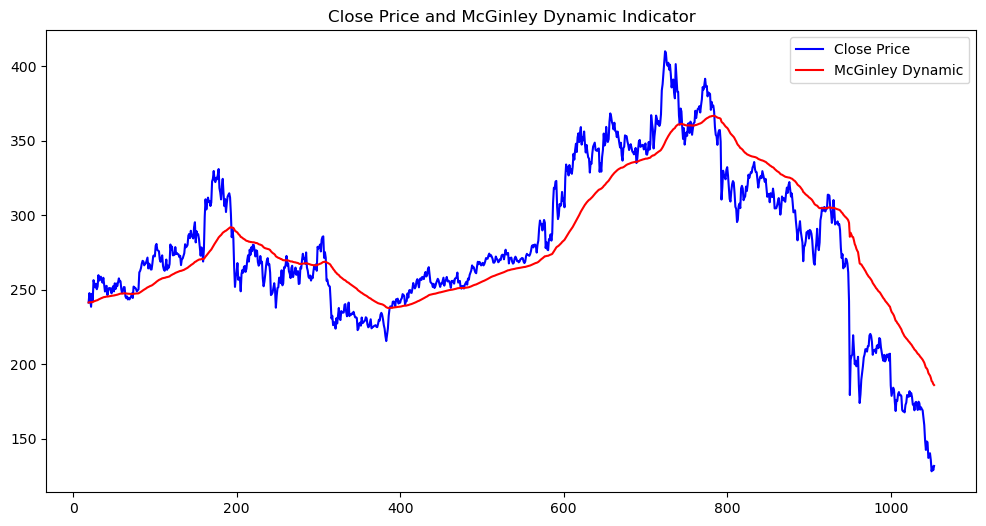

,pair,date,high,low,open,close,volume,20 Day MA,20 Day STD,Upper Band,Lower Band,buy,mgd,Trend
19,USDT_BTC,1970-01-01 00:00:01.618074000,243.23,234.36,236.31,241.38,42477984.53,230.1465,5.530790,241.208079,219.084921,NaN,241.380000,1.0
20,USDT_BTC,1970-01-01 00:00:01.618077600,250.51,236.54,241.31,247.65,59520571.21,231.4395,6.424900,244.289300,218.589700,NaN,241.559739,1.0
21,USDT_BTC,1970-01-01 00:00:01.618081200,247.78,242.81,247.67,243.16,19875867.45,232.5415,6.451836,245.445171,219.637829,NaN,241.552749,1.0
22,USDT_BTC,1970-01-01 00:00:01.618084800,244.58,236.09,243.20,238.51,25020721.70,233.4420,5.917435,245.276870,221.607130,NaN,241.445834,0.0
23,USDT_BTC,1970-01-01 00:00:01.618088400,247.29,237.64,238.52,247.19,17802742.99,234.6680,6.105281,246.878562,222.457438,NaN,241.641230,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,USDT_BTC,1970-01-01 00:00:01.621782000,141.22,134.51,140.30,135.80,16107351.51,159.0425,14.838545,188.719590,129.365410,NaN,190.888029,0.0
1050,USDT_BTC,1970-01-01 00:00:01.621785600,137.59,118.03,135.85,128.19,56170734.64,156.7410,15.892812,188.526625,124.955375,NaN,188.749191,0.0
1051,USDT_BTC,1970-01-01 00:00:01.621789200,136.78,127.31,128.12,131.33,35899641.71,154.5715,16.266511,187.104521,122.038479,NaN,188.109797,0.0
1052,USDT_BTC,1970-01-01 00:00:01.621792800,134.12,125.14,131.33,128.89,20195623.01,152.3910,16.655021,185.701042,119.080958,NaN,186.694439,0.0


In [73]:
# McGinley Dynamic Indicator

from math import sqrt
import statistics

def mcginley_dynamic(price, period=100):
    if len(price) < price:
        return
    k = 2 / (period + 1)
    ema = statistics.mean(price[-period:])
    for i in range(period, len(price)):
        ema = price[i] * k + ema * (1 - k)
        mgd = ema * (1 + (sqrt(period) - 1) / 2) ** 2
        mgd = mgd * price[i] / mgd

p = 100
md = df["close"].ewm(span=p, adjust=False).mean()
mgd = md + (df["close"] - md) / (p * (df["close"]/md)**4)
df["mgd"] = mgd

plt.figure(figsize=(12,6))
plt.plot(df['close'], label='Close Price', color='blue')
plt.plot(df['mgd'], label='McGinley Dynamic', color='red')
plt.title('Close Price and McGinley Dynamic Indicator')
plt.legend()
plt.show()

df["Trend"] = df["close"].where(df["close"] > df["mgd"], 0)
df["Trend"] = df["Trend"].where(df["close"] < df["mgd"], 1)
df

In [74]:
def smoothed_moving_average(self, array, period):
    smoothed = [sum(array[:period]) / period]  # initial SMA
    for i in range(period, len(array)):
        smoothed.append((smoothed[-1] * (period - 1) + array[i]) / period)
    return smoothed

def ADX_indicator(self, pair, period=14):
    high = self.data[pair]['high']
    low = self.data[pair]['low']
    close = self.data[pair]['close']
    TR = []
    DMplus = []
    DMminus = []

    for i in range(1, len(close)):
        TR.append(max(high[i] - low[i], abs(high[i] - close[i - 1]), abs(low[i] - close[i - 1])))
        if high[i] - high[i - 1] > low[i - 1] - low[i]:
            DMplus.append(max(high[i] - high[i - 1], 0))
            DMminus.append(0)
        else:
            DMplus.append(0)
            DMminus.append(max(low[i - 1] - low[i], 0))

    ATR = self.smoothed_moving_average(TR, period)
    ADMP = self.smoothed_moving_average(DMplus, period)
    ADMN = self.smoothed_moving_average(DMminus, period)
    
    DIplus = [(ADMP[i] / ATR[i]) * 100 for i in range(len(ATR))]
    DIminus = [(ADMN[i] / ATR[i]) * 100 for i in range(len(ATR))]
    DX = [(abs(DIplus[i] - DIminus[i]) / abs(DIplus[i] + DIminus[i])) * 100 for i in range(len(DIplus))]
    
    ADX = self.smoothed_moving_average(DX, period)

    return ADX[-1], DIplus[-1], DIminus[-1]

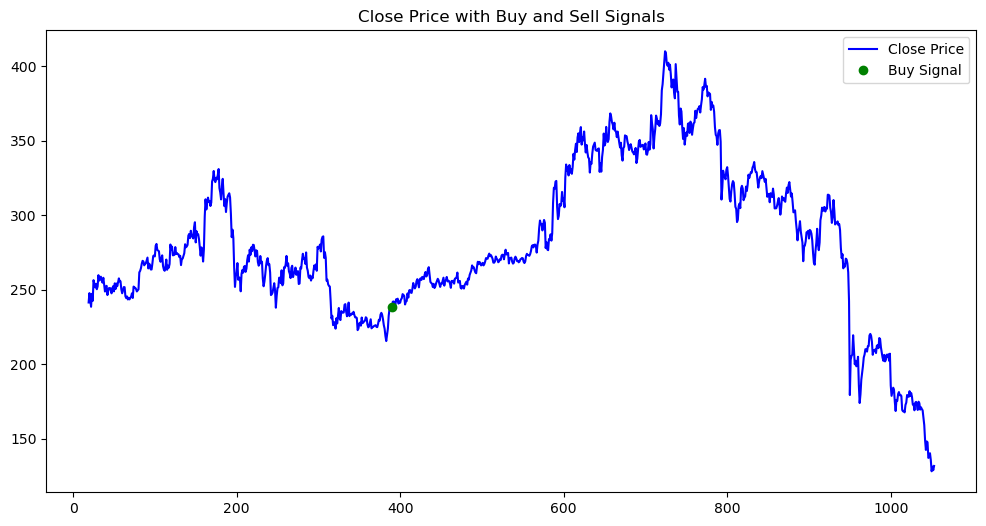

In [75]:
# make specific closing price with line eg: 215.52
buys = [238.04]
sell = [255.63, 255.5, 255.22, 255.31, 408.93, 402.22, 397.53, 390.92, 382.39, 362.14, 371.21, 373.43, 357.01, 179.91, 209.28, 202.29, 173.29]

# no_move = []
df['buys'] = df['close'].where(df['close'].isin(buys))

# df["ema"] = df["close"].ewm(span=10, adjust=False).mean()

# plot buy and sell signals
plt.figure(figsize=(12,6))
plt.plot(df['close'], label='Close Price', color='blue')
plt.plot(df['buys'], 'o', label='Buy Signal', color='green')
# plt.plot(df['sell'], 'o', label='Sell Signal', color='red')
# plt.plot(df['no_move'], 'o', label='No Move', color='black')
# plt.plot(df['mgd'], label='McGinley Dynamic', color='yellow')
# plt.plot(df["ema"], label='EMA', color='orange')
plt.title('Close Price with Buy and Sell Signals')
plt.legend()
plt.show()

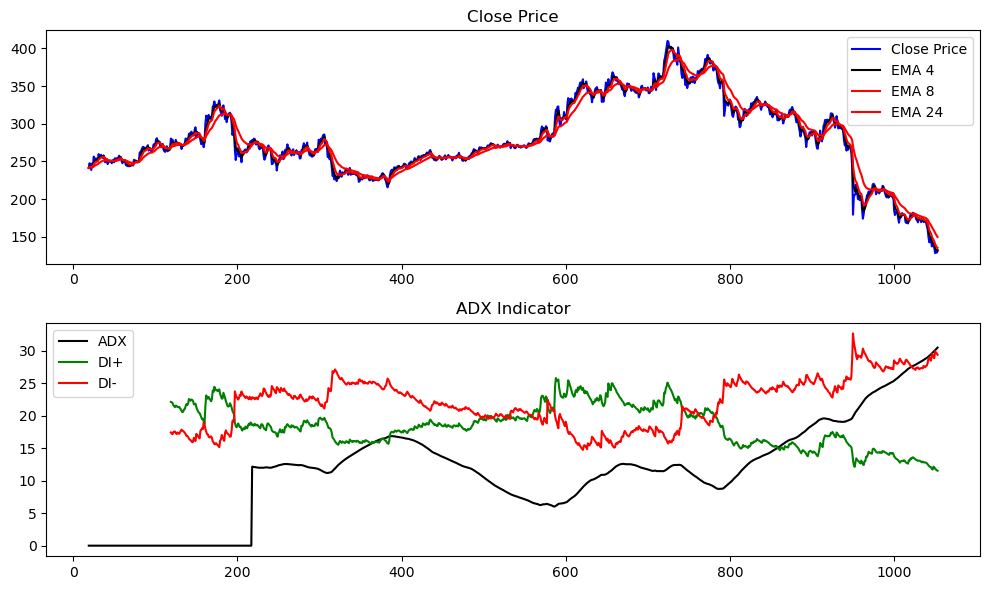

In [76]:
import talib

p = 100
ADX = talib.ADX(df['high'], df['low'], df['close'], timeperiod=p)
di_plus = talib.PLUS_DI(df['high'], df['low'], df['close'], timeperiod=p)
di_minus = talib.MINUS_DI(df['high'], df['low'], df['close'], timeperiod=p)

df['ADX'] = ADX
df['ADX'] = df['ADX'].fillna(0)

df['DI+'] = di_plus
df['DI+'] = df['DI+'].fillna(0)
df['DI-'] = di_minus
df['DI-'] = df['DI-'].fillna(0)

# have close price where di+ is greater than di-
df['buy'] = df['close'].where(df['DI+'] > df['DI-'])
df['sell'] = df['close'].where(df['DI+'] < df['DI-'])

df['20 Day MA'] = df['close'].rolling(window=20).mean()
df['20 Day STD'] = df['close'].rolling(window=20).std()

df['Upper Band'] = df['20 Day MA'] + (df['20 Day STD'] * 2)
df["Lower Band"] = df['20 Day MA'] - (df['20 Day STD'] * 2)
# df = df.dropna()

fig, axs = plt.subplots(2, figsize=(10, 6))

df["EMA 50"] = df["close"].ewm(span=50, adjust=False).mean()

df["buy"] = df["close"].where((df["DI+"] > df["DI-"]) & (df['close'] > df['EMA 50']))
df["sell"] = df["close"].where((df["DI+"] < df["DI-"]) & (df['close'] < df['EMA 50']))
df["ADX Cross Up"] = df["close"].where((df["DI+"] > df["DI-"]))
df["ADX Cross Down"] = df["close"].where((df["DI+"] < df["DI-"]))

axs[0].plot(df['close'], label='Close Price', color='blue')
axs[0].plot(df['EMA 50'], label='EMA 50', color='black')

# bollinger bands

# plot buy and sell signals
axs[0].plot(df['buy'], '-', label='Buy Signal', color='green')
axs[0].plot(df['sell'], '-', label='Sell Signal', color='red')

axs[0].set_title('Close Price')
axs[0].legend()

axs[1].plot(di_plus, label='DI+', color='green')
axs[1].plot(di_minus, label='DI-', color='red')
axs[1].set_title('ADX Indicator')
axs[1].legend()

plt.tight_layout()
plt.show()

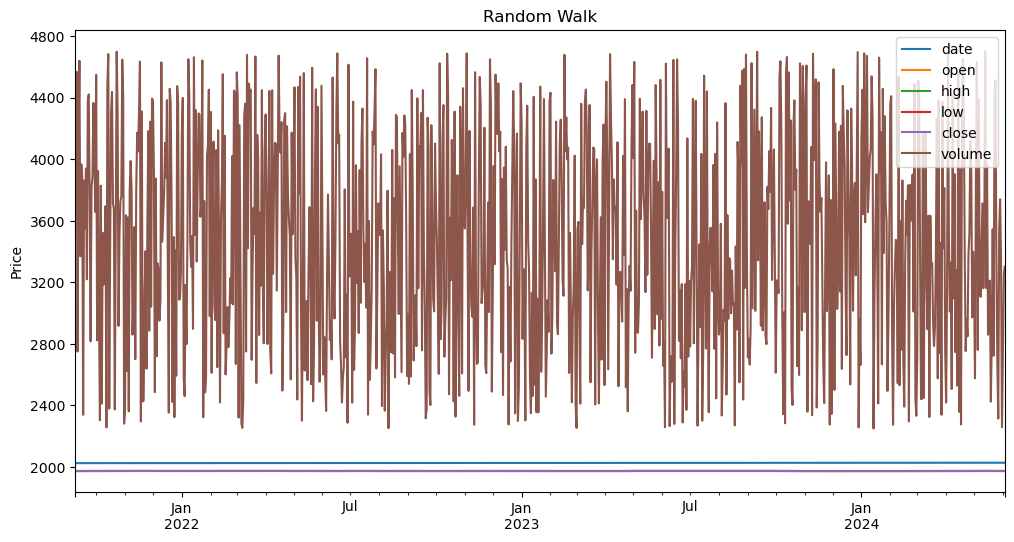

In [135]:
# import pandas as pd
# import numpy as np
# import random
# import matplotlib.pyplot as plt

# # Set a seed for reproducibility
# np.random.seed(random.randint(0, 100000))

# # Define the parameters
# num_days = 1000  # Number of trading days in a year
# initial_close = 1000  # Initial stock close
# volatility = 0.50  # Annual volatility of the stock

# # Generate the random walk
# returns = np.random.normal(loc=0, scale=volatility/np.sqrt(num_days), size=num_days)
# close = initial_close * np.cumprod(1 + returns)

# # Generate open, high, low prices based on close price
# open_ = close + np.random.uniform(-0.03, 0.03, size=num_days) * close
# high = close + np.random.uniform(0, 0.03, size=num_days) * close
# low = close - np.random.uniform(0, 0.03, size=num_days) * close
# volume = np.random.randint(100000, 1000000, size=num_days)
# # date should be in numeric format eg. 1618009200
# date = pd.date_range('1/1/2024', periods=num_days)

# # Create a DataFrame
# # pair,date,high,low,open,close,volume
# df = pd.DataFrame({'date': date, 'open': open_, 'high': high, 'low': low, 'close': close, 'volume': volume})

# df.index = pd.date_range(end='6/3/2024', periods=num_days)

# # Plot the data
# df.plot(figsize=(12,6))
# plt.title('Random Walk')
# plt.ylabel('Price')
# plt.show()


In [137]:
# import pandas as pd
# import numpy as np
# import random

# # Define the pairs
# pairs = ["USDT_BTC", "USDT_ETH", "USDT_XRP", "USDT_BCH", "USDT_LTC", "USDT_EOS", "USDT_XMR", "USDT_TRX", "USDT_DASH", "USDT_ETC"]
# # pair,date,high,low,open,close,volume
# for i in range(1):
#     pair = random.choice(pairs)
#     df = pd.DataFrame(
#         {        
#             'pair': pair,
#             'date': (date - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s'),
#             'high': np.round(high, 2),
#             'low': np.round(low, 2),
#             'open': np.round(open_, 2),
#             'close': np.round(close, 2),
#             'volume' : np.round(volume, 0),
#         }
#     )
#     df.to_csv(f'training-set_{pair}-{i}.csv', index=False)
